In [ ]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [159]:
FILE_PATH = os.path.join(os.getcwd(), 'Dataset','first inten project.csv')
df = pd.read_csv(FILE_PATH)

In [160]:
df.isna().sum()

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

In [161]:
df.duplicated().sum()

0

In [162]:
df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_')

In [163]:
df['number_of_people'] = df['number_of_adults'] + df['number_of_children']
df['number_of_nights'] = df['number_of_weekend_nights'] + df['number_of_week_nights']



In [164]:
df.drop(columns=['booking_id', 'number_of_adults', 'number_of_children', 'number_of_weekend_nights', 'number_of_week_nights'], axis = 1,inplace=True)


In [165]:
# df = df[['number_of_people', 'number_of_nights', 'type_of_meal', 'car_parking_space', 'room_type', 'lead_time','market_segment_type', 'repeated', 'p-c', 'p-not-c', 'average_price','special_requests', 'date_of_reservation', 'booking_status',]]

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   type_of_meal         36285 non-null  object 
 1   car_parking_space    36285 non-null  int64  
 2   room_type            36285 non-null  object 
 3   lead_time            36285 non-null  int64  
 4   market_segment_type  36285 non-null  object 
 5   repeated             36285 non-null  int64  
 6   p-c                  36285 non-null  int64  
 7   p-not-c              36285 non-null  int64  
 8   average_price        36285 non-null  float64
 9   special_requests     36285 non-null  int64  
 10  date_of_reservation  36285 non-null  object 
 11  booking_status       36285 non-null  object 
 12  number_of_people     36285 non-null  int64  
 13  number_of_nights     36285 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 3.9+ MB


In [167]:
df['date_of_reservation'] = pd.to_datetime(df['date_of_reservation'], format= 'mixed', errors='coerce')


In [168]:
df['date_of_reservation'].isna().sum()


37

In [169]:
df= df.dropna(subset=['date_of_reservation'])

In [170]:
df['year'] = df['date_of_reservation'].dt.year
df['month'] = df['date_of_reservation'].dt.month
df.drop('date_of_reservation', axis=1, inplace=True)

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36248 entries, 0 to 36284
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   type_of_meal         36248 non-null  object 
 1   car_parking_space    36248 non-null  int64  
 2   room_type            36248 non-null  object 
 3   lead_time            36248 non-null  int64  
 4   market_segment_type  36248 non-null  object 
 5   repeated             36248 non-null  int64  
 6   p-c                  36248 non-null  int64  
 7   p-not-c              36248 non-null  int64  
 8   average_price        36248 non-null  float64
 9   special_requests     36248 non-null  int64  
 10  booking_status       36248 non-null  object 
 11  number_of_people     36248 non-null  int64  
 12  number_of_nights     36248 non-null  int64  
 13  year                 36248 non-null  int32  
 14  month                36248 non-null  int32  
dtypes: float64(1), int32(2), int64(8), object

In [172]:
# Reorder columns to have 'booking_status' at the end
cols = list(df.columns)
cols.remove('booking_status')
df = df[cols + ['booking_status']]

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36248 entries, 0 to 36284
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   type_of_meal         36248 non-null  object 
 1   car_parking_space    36248 non-null  int64  
 2   room_type            36248 non-null  object 
 3   lead_time            36248 non-null  int64  
 4   market_segment_type  36248 non-null  object 
 5   repeated             36248 non-null  int64  
 6   p-c                  36248 non-null  int64  
 7   p-not-c              36248 non-null  int64  
 8   average_price        36248 non-null  float64
 9   special_requests     36248 non-null  int64  
 10  number_of_people     36248 non-null  int64  
 11  number_of_nights     36248 non-null  int64  
 12  year                 36248 non-null  int32  
 13  month                36248 non-null  int32  
 14  booking_status       36248 non-null  object 
dtypes: float64(1), int32(2), int64(8), object

In [174]:
df['booking_status'] = df['booking_status'].map({'Canceled': 1, 'Not_Canceled': 0})

In [175]:
X = df.drop('booking_status', axis=1)
y = df['booking_status']   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [176]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28998, 14), (7250, 14), (28998,), (7250,))

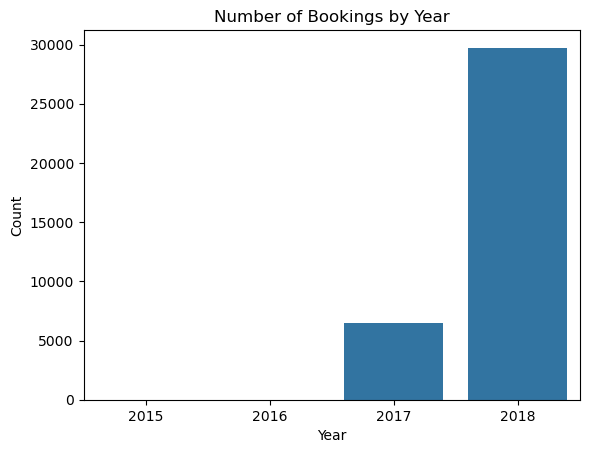

In [177]:
sns.countplot(data=df, x='year')
plt.title('Number of Bookings by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

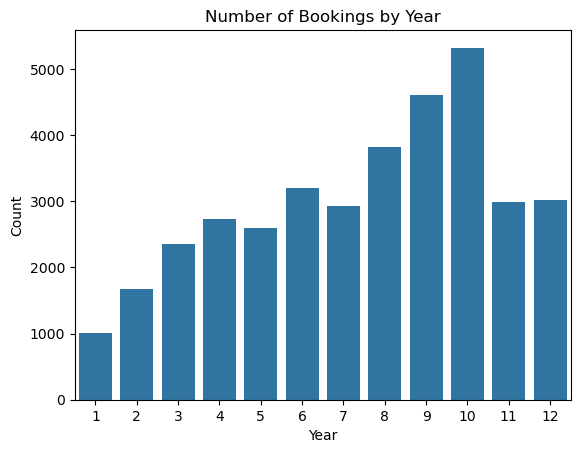

In [178]:
sns.countplot(data=df, x='month')
plt.title('Number of Bookings by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

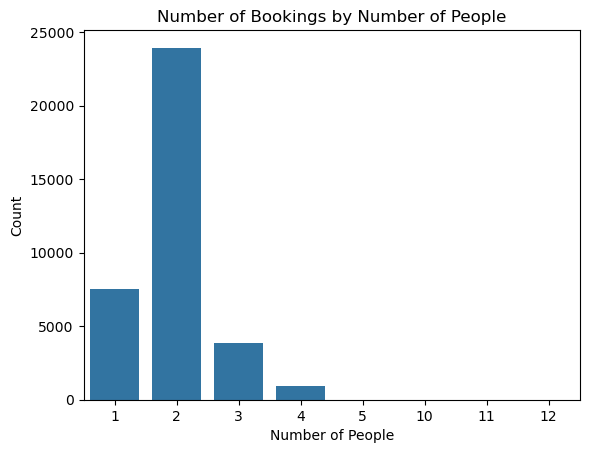

In [179]:
sns.countplot(data=df, x='number_of_people')
plt.title('Number of Bookings by Number of People')
plt.xlabel('Number of People')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='number_of_people'>

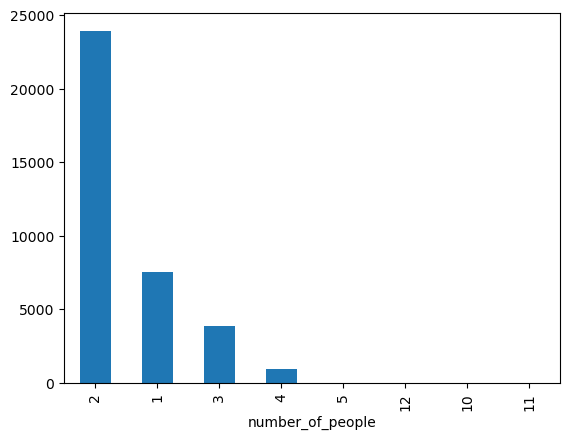

In [180]:
df['number_of_people'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'Average Price Distribution')

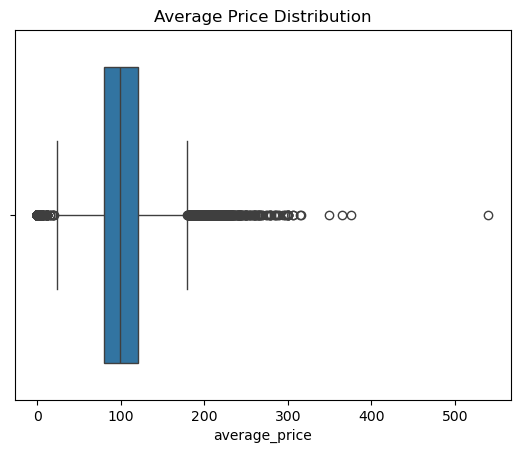

In [181]:
# plot the average price distribution
sns.boxplot(data=X_train, x='average_price')
plt.title('Average Price Distribution')

In [182]:
y_train = y_train[X_train['average_price'] < 300]
X_train = X_train[X_train['average_price'] < 300]

Text(0.5, 1.0, 'Average Price Distribution (Filtered)')

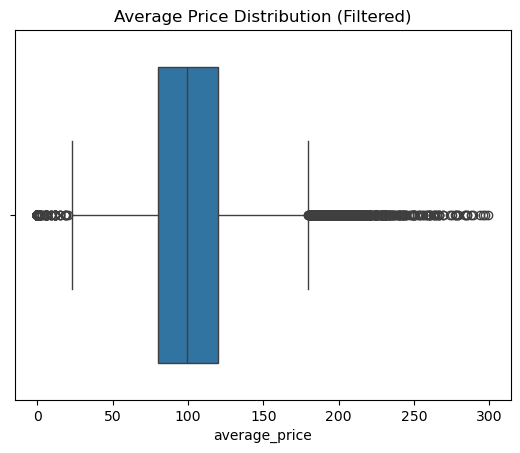

In [183]:
sns.boxplot(data=X_train, x='average_price')
plt.title('Average Price Distribution (Filtered)')

In [184]:
num_cols = X_train.select_dtypes(include=['int64','float64']).columns

skew_values = X_train[num_cols].skew().sort_values(ascending=False)

print(skew_values)

p-c                  24.202484
p-not-c              19.119077
repeated              5.973016
car_parking_space     5.434078
number_of_nights      2.187966
lead_time             1.282895
special_requests      1.151509
number_of_people      0.905431
average_price         0.568793
dtype: float64


In [185]:
high_skew = skew_values[abs(skew_values) > 3]
print(high_skew)

p-c                  24.202484
p-not-c              19.119077
repeated              5.973016
car_parking_space     5.434078
dtype: float64


In [186]:
for col in high_skew.index:
    X_train[col] = np.log1p(X_train[col])

In [187]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28985 entries, 21359 to 15814
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   type_of_meal         28985 non-null  object 
 1   car_parking_space    28985 non-null  float64
 2   room_type            28985 non-null  object 
 3   lead_time            28985 non-null  int64  
 4   market_segment_type  28985 non-null  object 
 5   repeated             28985 non-null  float64
 6   p-c                  28985 non-null  float64
 7   p-not-c              28985 non-null  float64
 8   average_price        28985 non-null  float64
 9   special_requests     28985 non-null  int64  
 10  number_of_people     28985 non-null  int64  
 11  number_of_nights     28985 non-null  int64  
 12  year                 28985 non-null  int32  
 13  month                28985 non-null  int32  
dtypes: float64(5), int32(2), int64(4), object(3)
memory usage: 3.1+ MB


In [188]:
cat = ['type_of_meal', 'room_type', 'market_segment_type']

In [189]:
# Apply OneHotEncoder to categorical columns
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train[cat])
X_test_encoded = encoder.transform(X_test[cat])

# Convert to DataFrames
X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(cat), index=X_train.index)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(cat), index=X_test.index)

# Drop original categorical columns and combine with encoded columns
X_train = X_train.drop(columns=cat).reset_index(drop=True)
X_test = X_test.drop(columns=cat).reset_index(drop=True)
X_train_encoded = X_train_encoded.reset_index(drop=True)
X_test_encoded = X_test_encoded.reset_index(drop=True)

X_train = pd.concat([X_train, X_train_encoded], axis=1)
X_test = pd.concat([X_test, X_test_encoded], axis=1)

In [190]:
X_train.head()

,car_parking_space,lead_time,repeated,p-c,p-not-c,average_price,special_requests,number_of_people,number_of_nights,year,...,room_type_Room_Type 3,room_type_Room_Type 4,room_type_Room_Type 5,room_type_Room_Type 6,room_type_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,0.0,50,0.000000,0.000000,0.000000,63.75,0,2,4,2018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,8,0.693147,0.693147,2.890372,65.00,1,1,1,2018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,148,0.000000,0.000000,0.000000,136.43,1,3,4,2018,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,4,0.000000,0.000000,0.000000,86.00,1,1,5,2018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,23,0.000000,0.000000,0.000000,128.49,0,2,6,2018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [191]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Create and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=500, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Random Forest Model Performance:
Accuracy: 89.63%
Precision: 0.8601
Recall: 0.8151
F1-Score: 0.8370

Confusion Matrix:
[[4567  314]
 [ 438 1931]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      4881
           1       0.86      0.82      0.84      2369

    accuracy                           0.90      7250
   macro avg       0.89      0.88      0.88      7250
weighted avg       0.90      0.90      0.90      7250



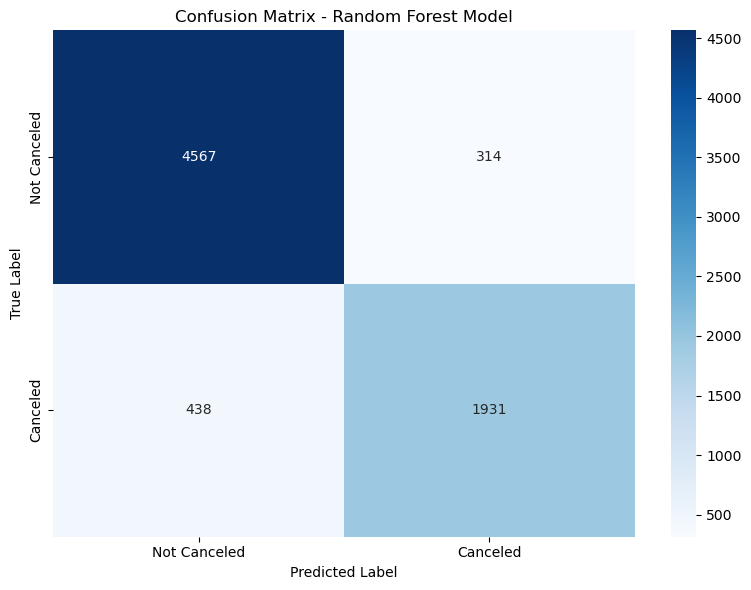

In [192]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Not Canceled', 'Canceled'],
            yticklabels=['Not Canceled', 'Canceled'])
plt.title('Confusion Matrix - Random Forest Model')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()